# 决策边界

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x, y = np.meshgrid(np.arange(1, 2, 0.2), np.arange(2, 3, 0.2))

In [3]:
x

array([[1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8],
       [1. , 1.2, 1.4, 1.6, 1.8]])

In [4]:
y

array([[2. , 2. , 2. , 2. , 2. ],
       [2.2, 2.2, 2.2, 2.2, 2.2],
       [2.4, 2.4, 2.4, 2.4, 2.4],
       [2.6, 2.6, 2.6, 2.6, 2.6],
       [2.8, 2.8, 2.8, 2.8, 2.8]])

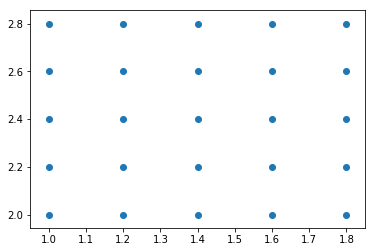

In [5]:
plt.scatter(x, y)
plt.show()

In [6]:
X = np.concatenate([x.reshape(-1, 1), y.reshape(-1, 1)], axis=1)

In [7]:
X

array([[1. , 2. ],
       [1.2, 2. ],
       [1.4, 2. ],
       [1.6, 2. ],
       [1.8, 2. ],
       [1. , 2.2],
       [1.2, 2.2],
       [1.4, 2.2],
       [1.6, 2.2],
       [1.8, 2.2],
       [1. , 2.4],
       [1.2, 2.4],
       [1.4, 2.4],
       [1.6, 2.4],
       [1.8, 2.4],
       [1. , 2.6],
       [1.2, 2.6],
       [1.4, 2.6],
       [1.6, 2.6],
       [1.8, 2.6],
       [1. , 2.8],
       [1.2, 2.8],
       [1.4, 2.8],
       [1.6, 2.8],
       [1.8, 2.8]])

In [8]:
def height(x):
    # 1  2
    return np.abs((x[0] - 1) * (x[1] - 2))

In [9]:
z = np.array([height(x) for x in X])
z

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.08, 0.12, 0.16, 0.  ,
       0.08, 0.16, 0.24, 0.32, 0.  , 0.12, 0.24, 0.36, 0.48, 0.  , 0.16,
       0.32, 0.48, 0.64])

In [10]:
z = z.reshape(x.shape)
z

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.04, 0.08, 0.12, 0.16],
       [0.  , 0.08, 0.16, 0.24, 0.32],
       [0.  , 0.12, 0.24, 0.36, 0.48],
       [0.  , 0.16, 0.32, 0.48, 0.64]])

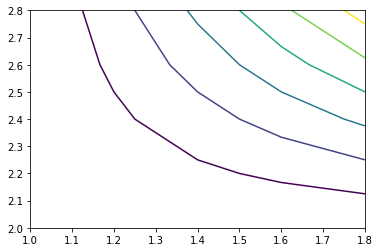

In [11]:
plt.contour(x, y, z)
plt.show()

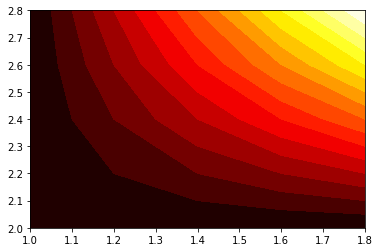

In [12]:
plt.contourf(x, y, z, 20, cmap=plt.cm.hot)      #  分20个梯度，热力图
plt.show()

In [13]:
X = np.loadtxt('x.txt')
X = X[:, 2:]
y = np.loadtxt('y.txt')

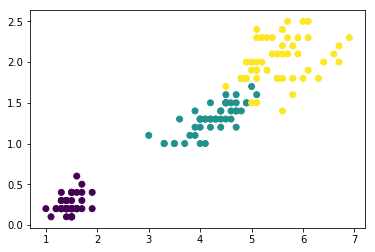

In [14]:
plt.scatter(X[:, 0], X[:, 1], c=y)   # c=y 表示颜色根据 y 的分类值来区别
plt.show()

In [15]:
def plot_decision_boundary(X, y, predict_fun, step=0.1):
    x_min = X[:, 0].min() - 0.5
    x_max = X[:, 0].max() + 0.5
    y_min = X[:, 1].min() - 0.5
    y_max = X[:, 1].max() + 0.5
    
    x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, step), np.arange(y_min, y_max, step))      # 画网格
    labels = predict_fun(np.concatenate([x_mesh.reshape(-1, 1), y_mesh.reshape(-1, 1)], axis = 1))        # 获取预测值
    z = labels.reshape(x_mesh.shape)         # 将预测值转为与x_mesh相同的维度
    
    plt.contourf(x_mesh, y_mesh, z, cmap = plt.cm.Spectral)         # 画梯度图
    
    plt.scatter(X[:, 0], X[:, 1], c=y)                # 绘制散点图
    plt.show()

In [16]:
from ML.knn import KNeighborsClassifier

In [17]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(X, y)

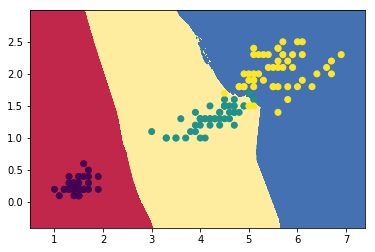

CPU times: user 5min 21s, sys: 2.3 s, total: 5min 23s
Wall time: 5min 33s


In [22]:
%%time
plot_decision_boundary(X, y, lambda x: knn_clf.predict(x))

In [19]:
from ML.decision_tree import DecisionTreeClassifier

In [20]:
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X, y)

d=0, v=2.45, g=0.5, l=None

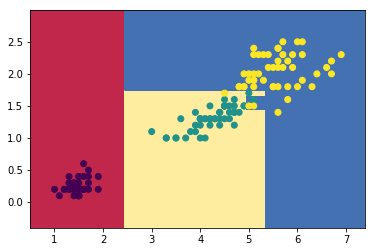

In [21]:
plot_decision_boundary(X, y, lambda x: dt_clf.predict(x), step=0.01)